In [2]:
import sys
sys.path.append('..')
import h5py
import yaml
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../flowrec/utils/a4.mplstyle')

from pathlib import Path
from mpl_toolkits.axes_grid1 import ImageGrid

from flowrec.utils import my_discrete_cmap

In [3]:
results_dir = Path('../local_results/2dkol/reduce_observations')

In [4]:
def is_experiment_input(name):
    if 'min_input' in name:
        return True
    else:
        return False
def is_experiment_sensors(name):
    if 'min_sensor' in name:
        return True
    else:
        return False

# Changing number of input

In [12]:
def get_results_inputs(folder):
    d = Path(results_dir,folder)
    with h5py.File(Path(d,'summary.h5')) as hf:
        names = np.array(hf.get('runs_name')).astype('unicode')
        l_train = np.array(hf.get('runs_loss_train'))
        # l_val = np.array(hf.get('runs_loss_val'))

    num_input = []
    loss_total = []
    loss_rel = []
    for i in range(len(names)):
        if is_experiment_input(names[i]):
            name_split = names[i].split('-')
            num_input.append(int(name_split[-2]))
            loss_total.append(np.sum(l_train[i,1:]))
            loss_rel.append(l_train[i,0])
    
    num_input = np.array(num_input)
    loss_total = np.array(loss_total)
    loss_rel = np.array(loss_rel)
    
    _sort_idx = np.argsort(num_input)
    num_input = num_input[_sort_idx]
    loss_total = loss_total[_sort_idx]
    loss_rel = loss_rel[_sort_idx]

    return num_input, loss_total, loss_rel

In [13]:
num_input_classic, loss_total_classic, loss_classic = get_results_inputs('classic')
num_input_3, loss_total_3, loss_3 = get_results_inputs('loss3')
num_input_mean3, loss_total_mean3, loss_mean3 = get_results_inputs('mean3')

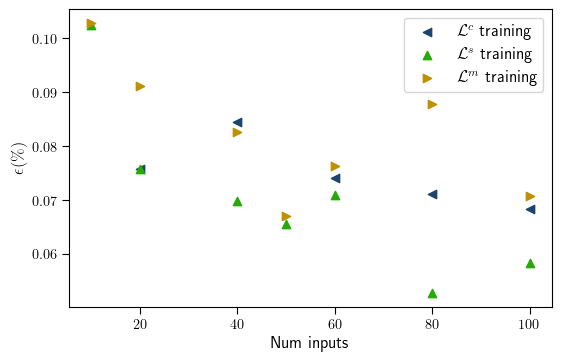

In [30]:
# plot relative loss
plt.figure(figsize=(5.5,3.5))
ax = plt.subplot(111)

ax.scatter(num_input_classic, loss_classic, label='$\mathcal{L}^c$ training',marker='<', color=my_discrete_cmap(0))
ax.scatter(num_input_3, loss_3, label='$\mathcal{L}^s$ training',marker='^', color=my_discrete_cmap(1))
ax.scatter(num_input_mean3, loss_mean3, label='$\mathcal{L}^m$ training',marker='>', color=my_discrete_cmap(2))
ax.legend()
ax.set(ylabel='$\epsilon (\%)$', xlabel='Num inputs')
plt.show()

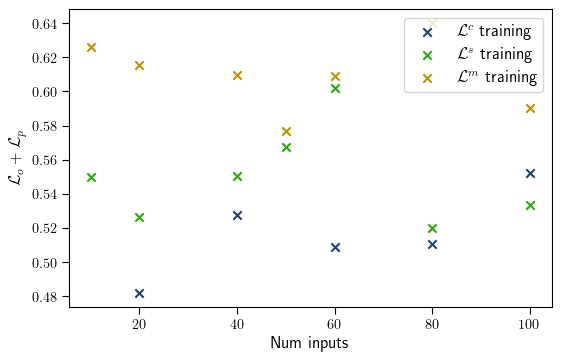

In [20]:
# plot total loss (unweighted)
plt.figure(figsize=(5.5,3.5))
ax = plt.subplot(111)

ax.scatter(num_input_classic, loss_total_classic, label='$\mathcal{L}^c$ training',marker='x', color=my_discrete_cmap(0))
ax.scatter(num_input_3, loss_total_3, label='$\mathcal{L}^s$ training',marker='x', color=my_discrete_cmap(1))
ax.scatter(num_input_mean3, loss_total_mean3, label='$\mathcal{L}^m$ training',marker='x', color=my_discrete_cmap(2))
ax.legend()
ax.set(ylabel='$\mathcal{L}_o + \mathcal{L}_p$', xlabel='Num inputs')
plt.show()